<a href="https://colab.research.google.com/github/AndreSlavescu/computer-vision-bootcamp/blob/master/UWARG_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Waterloo Arial Robotics Group Computer Vision Bootcamp

In [1]:
"""
This is a starter file to get you going. You may also include other files if you feel it's necessary.

Make sure to follow the code convention described here:
https://github.com/UWARG/computer-vision-python/blob/main/README.md#naming-and-typing-conventions

Hints:
* The internet is your friend! Don't be afraid to search for tutorials/intros/etc.
* We suggest using a convolutional neural network.
* TensorFlow Keras has the CIFAR-10 dataset as a module, so you don't need to manually download and unpack it.
"""

"\nThis is a starter file to get you going. You may also include other files if you feel it's necessary.\n\nMake sure to follow the code convention described here:\nhttps://github.com/UWARG/computer-vision-python/blob/main/README.md#naming-and-typing-conventions\n\nHints:\n* The internet is your friend! Don't be afraid to search for tutorials/intros/etc.\n* We suggest using a convolutional neural network.\n* TensorFlow Keras has the CIFAR-10 dataset as a module, so you don't need to manually download and unpack it.\n"

# Imports and Setup

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Plotting and Data Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Complex Iterator Library 
import itertools 

# Data Loading and Pre-Processing

In [12]:
# Load the Dataset
data = tf.keras.datasets.cifar10

# Split Data into x_train, y_train, x_test, and y_test as a set of two tuples for training and validation sets
# x_train, x_test -> training and testing sets of 32x32 pixel images
# y_train, y_test -> labels for the respective images 

(x_train, y_train), (x_test, y_test) = data.load_data()

In [34]:
# Check Format
print(f"x_train: {x_train.shape}\nx_test: {x_test.shape}")

x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)


In [14]:
"""
Based on the above output, we can see that our training sets are 50000 images each with 32x32 pixel images. 
Our test sets however are much smaller with around 10000 images of the same type.
"""

'\nBased on the above output, we can see that our training sets are 50000 images each with 32x32 pixel images. \nOur test sets however are much smaller with around 10000 images of the same type.\n'

In [18]:
# Flatten Label Data to be passed to the input layers we want 1D data for fully connected layers in the Feedforward Neural Network structure
y_train = y_train.flatten()
y_test = y_test.flatten()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Amount of Images')]

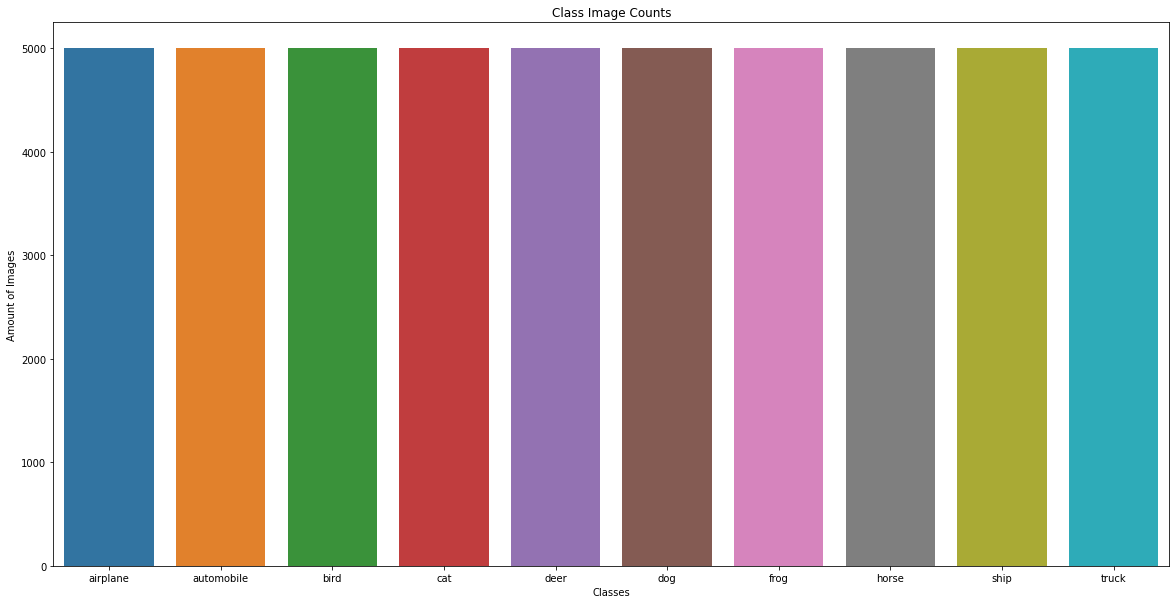

In [25]:
# Class Labels
classes = ['airplane', 
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck']

# Plot the Data
plt.figure(figsize=(20,10))
plot = sns.countplot(y_train)
plot.set(title = "Class Image Counts")
plot.set(xticklabels=classes)
plot.set(xlabel="Classes")
plot.set(ylabel="Amount of Images")

In [21]:
"""
From the above plot, we can observe that each class has a total of 5000 images.
Given that there are 10 classes, we have a total of 50,000 images.
"""

'\nFrom the above plot, we can observe that each class has a total of 5000 images.\nGiven that there are 10 classes, we have a total of 50,000 images.\n'

# Data Normalization and Reshaping

In [26]:
# Since we're constructing a CNN, we want normalized values for our data; values that range from 0 to 1
# Our data as it is right now, ranges from 0-255

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_train = x_train/255.0
x_test = x_test/255.0

In [27]:
# Using one-hot encoding, more features can be added to the categorical variables which are the labels
y_train = tf.one_hot(y_train.astype(np.int32), depth=len(classes))
y_test = tf.one_hot(y_test.astype(np.int32), depth=len(classes)) 

tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], shape=(10,), dtype=float32)


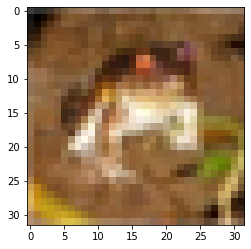

In [36]:
# Here is an example image with it's respective label 
plt.imshow(x_train[0])
print(y_train[0])

In [31]:
"""
The above image is a frog
"""

'\nThe above image is a frog\n'

# Building and Evaluating the Model

In [38]:
# Overfitting on the data is a risk that is enabled by the below parameters
# Training for too long will develop biases within the model, and undertraining
# Will affect the accuracy simply because there isn't enough confidence to make
# a valid prediction 

# There are techniques to prevent overfitting the model such as data augmentation
# Where artificial data is generated by altering existing data 
# (No Data augmentation will be employed in this notebook)

# Defining Constants
batch_size = 32
class_count = len(classes)
epochs = 30

In [40]:
# Model Desgin:
# 2 Convolution Layers with 32 Filters
# Pooling Layer
# 2 Convolution Layers with 64 Filters
# Pooling Layer
# Flatten Layer to convert data to 1D for Dense Layer Processing 
# 2 Dense Layers one of which is an Output Layer

# Pooling layers take the max float value from a 2x2 matrix of values and produces
# One pixel 

input_shape = (32, 32, 3)

# Define the Model - Sequential Model Structure
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = 3,
                           padding = "same",
                           input_shape = x_train.shape[1:],
                           activation = "relu"),
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = 3,
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = 3,
                           padding = "same",
                           activation = "relu"),
    tf.keras.layers.Conv2D(filters = 64,
                           kernel_size = 3,
                           activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 512, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = class_count, activation = "softmax")
])

In [41]:
# Using the Adam optimizer for a fast optimization algorithm to achieve the desired output 

# Compile the Model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-03, decay = 1e-05),
              loss = "categorical_crossentropy", metrics = ["accuracy"])

In [42]:
# Fit the Training Data

training = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/30
1563/1563 [==============================] - 165s 105ms/step - loss: 1.5172 - accuracy: 0.4414
Epoch 2/30
1563/1563 [==============================] - 170s 109ms/step - loss: 1.1085 - accuracy: 0.6078
Epoch 3/30
1563/1563 [==============================] - 162s 104ms/step - loss: 0.9426 - accuracy: 0.6658
Epoch 4/30
1563/1563 [==============================] - 156s 99ms/step - loss: 0.8471 - accuracy: 0.7040
Epoch 5/30
1563/1563 [==============================] - 155s 99ms/step - loss: 0.7775 - accuracy: 0.7267
Epoch 6/30
1563/1563 [==============================] - 155s 99ms/step - loss: 0.7218 - accuracy: 0.7485
Epoch 7/30
1563/1563 [==============================] - 155s 99ms/step - loss: 0.6785 - accuracy: 0.7623
Epoch 8/30
1563/1563 [==============================] - 155s 99ms/step - loss: 0.6341 - accuracy: 0.7790
Epoch 9/30
1563/1563 [==============================] - 155s 99ms/step - loss: 0.6034 - accuracy: 0.7877
Epoch 10/30
1563/1563 [=============================

[Text(209.74318181818177, 0.5, 'loss')]

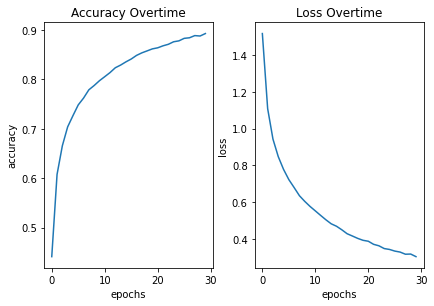

In [58]:
# Plot Accuracy and Loss with respect to the current epoch
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.tight_layout()

ax1.plot(training.history["accuracy"])
ax2.plot(training.history["loss"])

ax1.set(title = "Accuracy Overtime")
ax2.set(title = "Loss Overtime")
ax1.set(xlabel = "epochs")
ax1.set(ylabel = "accuracy")
ax2.set(xlabel = "epochs")
ax2.set(ylabel = "loss")

In [61]:
# Evaluating the Model's Performance Overtime

test_accuracy, test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 8s 27ms/step - loss: 0.6965 - accuracy: 0.7958
